In [3]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from momentum_signal import time_signal, cross_signal, dual_signal
from pricing import cost, cap_weight
from performance import performance, bm_performance, plot_performance

import FinanceDataReader as fdr 

In [2]:
# close = pd.read_csv('./clean_adj_close.csv', index_col = 0)
# close.index = pd.to_datetime(close.index)
# shares = pd.read_csv('./clean_number_of_shares.csv', index_col = 0)
# cap = close*shares

In [3]:
path = './json/fai_close_data.json'
with open(path, 'r') as f:
    data = json.load(f)

# Create a new dictionary with the desired format
parsed_data = {}
for key, value in data.items():
    parsed_data[key] = {}
    for inner_key, inner_value in value.items():
        parsed_data[key][inner_value['ISU_SRT_CD']] = int(inner_value['TDD_CLSPRC'].replace(',', ''))

# Convert the new dictionary to a pandas DataFrame
close = pd.DataFrame.from_dict(parsed_data, orient='index')
close.index = pd.to_datetime(close.index, format='%Y%m%d')

In [4]:
shares = pd.read_csv('./csv/clean_number_of_shares.csv', index_col = 0)
shares.index = pd.to_datetime(shares.index)
cap = close*shares

In [5]:
df = close
window_size = 252
quantile = 0.1
rebalancing_period = 21
costs = 0 #0.005

In [6]:
time_long, time_long_short = time_signal(df, window_size, rebalancing_period)
cross_long, cross_long_short = cross_signal(df, window_size, quantile, rebalancing_period)
dual_long, dual_long_short = dual_signal(df, window_size, quantile, rebalancing_period)

In [7]:
daily_return = close.pct_change(fill_method=None)
cap_weight = cap.div(cap.sum(axis = 1), axis = 0)
daily_return_cost = daily_return - cost(df, rebalancing_period)
kospi = fdr.DataReader('ks11', '2016-01-02', '2020-12-30') # benchmark

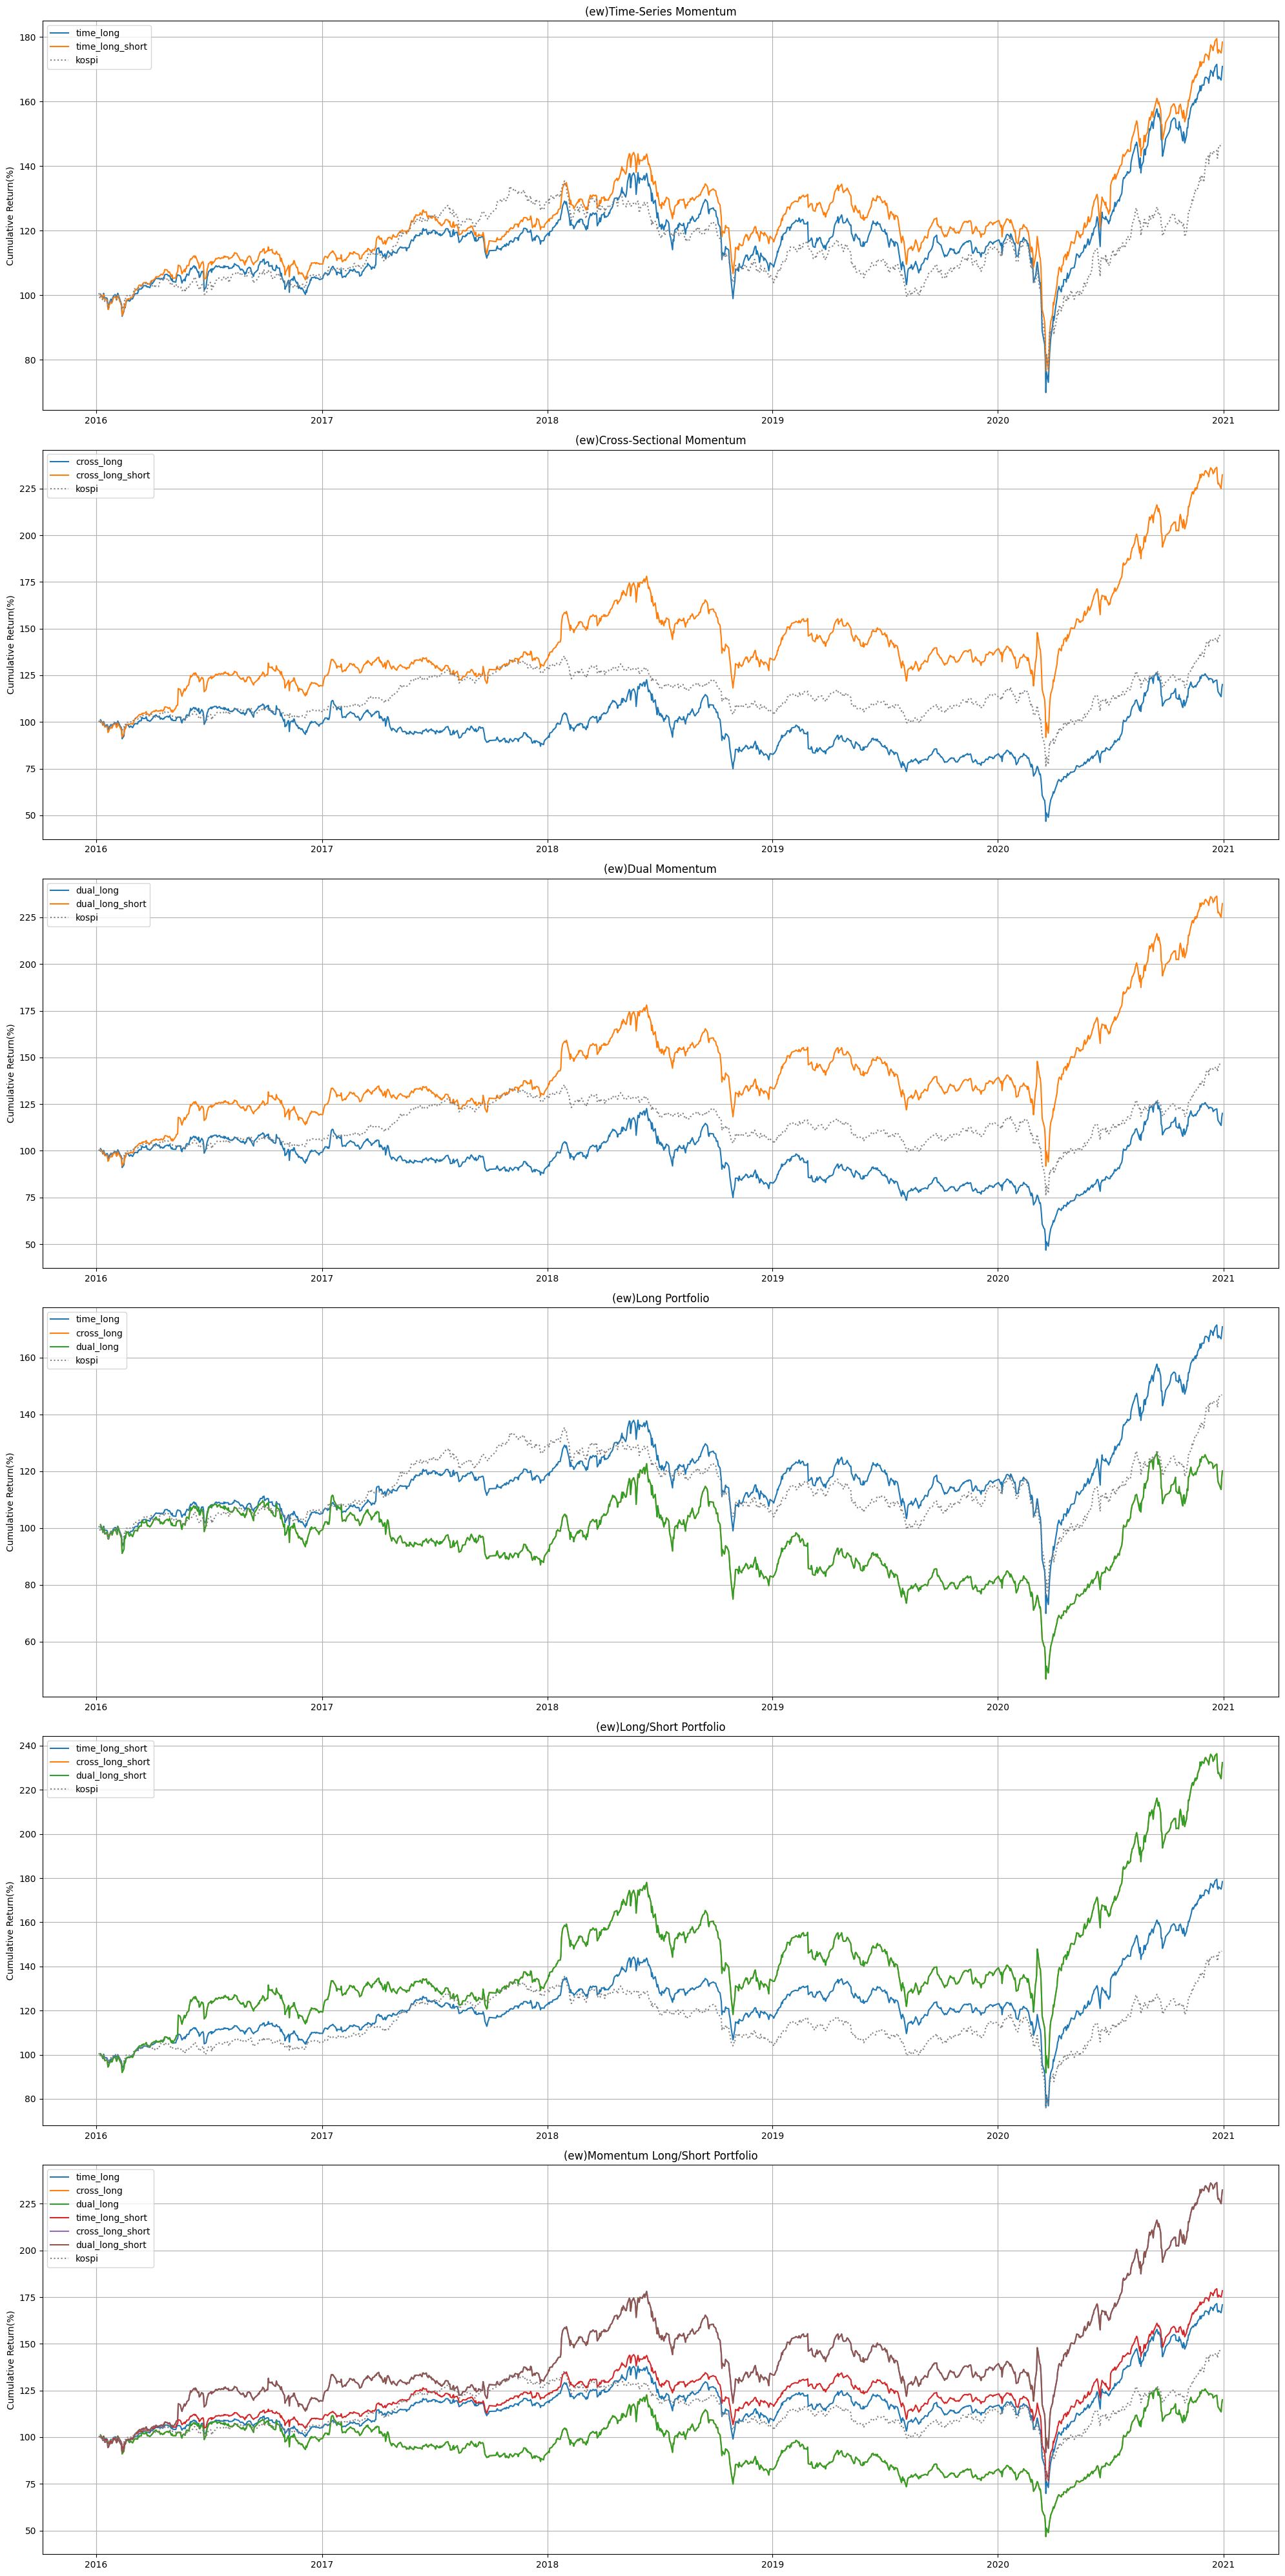

In [8]:
fig = plt.figure(figsize = (20,40))

plt.subplot(6,1,1)
plt.title('(ew)Time-Series Momentum')
plt.plot((1 + (daily_return*time_long).mean(axis = 1, skipna = True)).cumprod() * 100, label = 'time_long')
plt.plot((1 + (daily_return*time_long_short).mean(axis = 1, skipna = True)).cumprod() * 100, label = 'time_long_short')
plt.plot((1 + kospi["Close"].pct_change()).cumprod() * 100, ':', label = 'kospi', color = 'gray')
plt.ylabel('Cumulative Return(%)')
plt.grid()
plt.legend()

plt.subplot(6,1,2)
plt.title('(ew)Cross-Sectional Momentum')
plt.plot((1 + (daily_return*cross_long).mean(axis = 1, skipna = True)).cumprod() * 100, label = 'cross_long')
plt.plot((1 + (daily_return*cross_long_short).mean(axis = 1, skipna = True)).cumprod() * 100, label = 'cross_long_short')
plt.plot((1 + kospi["Close"].pct_change()).cumprod() * 100, ':', label = 'kospi', color = 'gray')
plt.ylabel('Cumulative Return(%)')
plt.grid()
plt.legend()

plt.subplot(6,1,3)
plt.title('(ew)Dual Momentum')
plt.plot((1 + (daily_return*dual_long).mean(axis = 1, skipna = True)).cumprod() * 100, label = 'dual_long')
plt.plot((1 + (daily_return*dual_long_short).mean(axis = 1, skipna = True)).cumprod() * 100, label = 'dual_long_short')
plt.plot((1 + kospi["Close"].pct_change()).cumprod() * 100, ':', label = 'kospi', color = 'gray')
plt.ylabel('Cumulative Return(%)')
plt.grid()
plt.legend()

plt.subplot(6,1,4)
plt.title('(ew)Long Portfolio')
plt.plot((1 + (daily_return*time_long).mean(axis = 1, skipna = True)).cumprod() * 100, label = 'time_long')
plt.plot((1 + (daily_return*cross_long).mean(axis = 1, skipna = True)).cumprod() * 100, label = 'cross_long')
plt.plot((1 + (daily_return*dual_long).mean(axis = 1, skipna = True)).cumprod() * 100, label = 'dual_long')
plt.plot((1 + kospi["Close"].pct_change()).cumprod() * 100, ':', label = 'kospi', color = 'gray')
plt.ylabel('Cumulative Return(%)')
plt.grid()
plt.legend()

plt.subplot(6,1,5)
plt.title('(ew)Long/Short Portfolio')
plt.plot((1 + (daily_return*time_long_short).mean(axis = 1, skipna = True)).cumprod() * 100, label = 'time_long_short')
plt.plot((1 + (daily_return*cross_long_short).mean(axis = 1, skipna = True)).cumprod() * 100, label = 'cross_long_short')
plt.plot((1 + (daily_return*dual_long_short).mean(axis = 1, skipna = True)).cumprod() * 100, label = 'dual_long_short')
plt.plot((1 + kospi["Close"].pct_change()).cumprod() * 100, ':', label = 'kospi', color = 'gray')
plt.ylabel('Cumulative Return(%)')
plt.grid()
plt.legend()

plt.subplot(6,1,6)
plt.title('(ew)Momentum Long/Short Portfolio')
plt.plot((1 + (daily_return*time_long).mean(axis = 1, skipna = True)).cumprod() * 100, label = 'time_long')
plt.plot((1 + (daily_return*cross_long).mean(axis = 1, skipna = True)).cumprod() * 100, label = 'cross_long')
plt.plot((1 + (daily_return*dual_long).mean(axis = 1, skipna = True)).cumprod() * 100, label = 'dual_long')
plt.plot((1 + (daily_return*time_long_short).mean(axis = 1, skipna = True)).cumprod() * 100, label = 'time_long_short')
plt.plot((1 + (daily_return*cross_long_short).mean(axis = 1, skipna = True)).cumprod() * 100, label = 'cross_long_short')
plt.plot((1 + (daily_return*dual_long_short).mean(axis = 1, skipna = True)).cumprod() * 100, label = 'dual_long_short')
plt.plot((1 + kospi["Close"].pct_change()).cumprod() * 100, ':', label = 'kospi', color = 'gray')
plt.ylabel('Cumulative Return(%)')
plt.grid()
plt.legend()

plt.tight_layout()

In [36]:
print('(ew)Adj Time Long :', performance(df, cap, 'ew', time_long, rebalancing_period, costs))
print('(ew)Adj Time Long/Short :', performance(df, cap, 'ew', time_long_short, rebalancing_period, costs))
print('(ew)Adj Cross Long :', performance(df, cap, 'ew', cross_long, rebalancing_period, costs))
print('(ew)Adj Cross Long/Short :', performance(df, cap, 'ew', cross_long_short, rebalancing_period, costs))
print('(ew)Adj Dual Long :', performance(df, cap, 'ew', dual_long, rebalancing_period, costs))
print('(ew)Adj Dual Long/Short :', performance(df, cap, 'ew', dual_long_short, rebalancing_period, costs))

Cum Return : 1.709 CAGR = 0.096 Sharpe Ratio : 0.390 MDD : -0.494
(ew)Adj Time Long : (1.709, 0.096, 0.39, -0.494)
Cum Return : 1.784 CAGR = 0.104 Sharpe Ratio : 0.461 MDD : -0.469
(ew)Adj Time Long/Short : (1.784, 0.104, 0.461, -0.469)
Cum Return : 1.200 CAGR = 0.032 Sharpe Ratio : 0.044 MDD : -0.618
(ew)Adj Cross Long : (1.2, 0.032, 0.044, -0.618)
Cum Return : 2.324 CAGR = 0.155 Sharpe Ratio : 0.573 MDD : -0.484
(ew)Adj Cross Long/Short : (2.324, 0.155, 0.573, -0.484)
Cum Return : 1.200 CAGR = 0.032 Sharpe Ratio : 0.044 MDD : -0.618
(ew)Adj Dual Long : (1.2, 0.032, 0.044, -0.618)
Cum Return : 2.324 CAGR = 0.155 Sharpe Ratio : 0.573 MDD : -0.484
(ew)Adj Dual Long/Short : (2.324, 0.155, 0.573, -0.484)


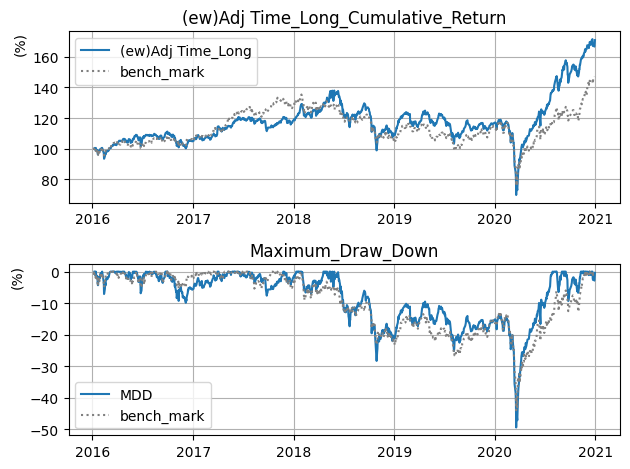

None


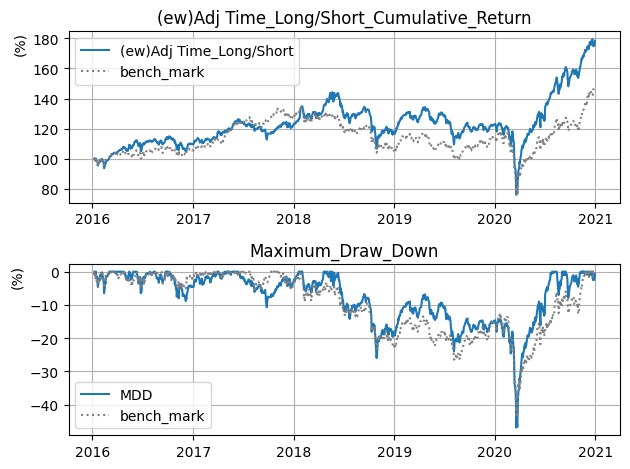

None


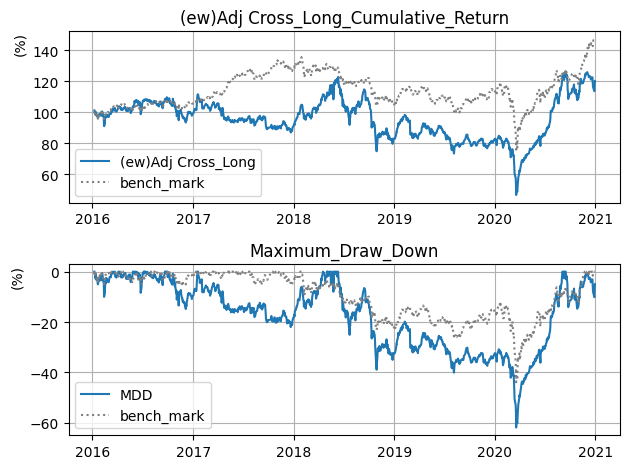

None


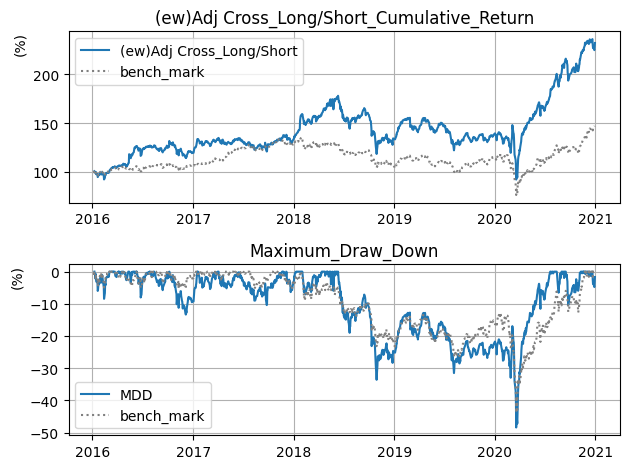

None


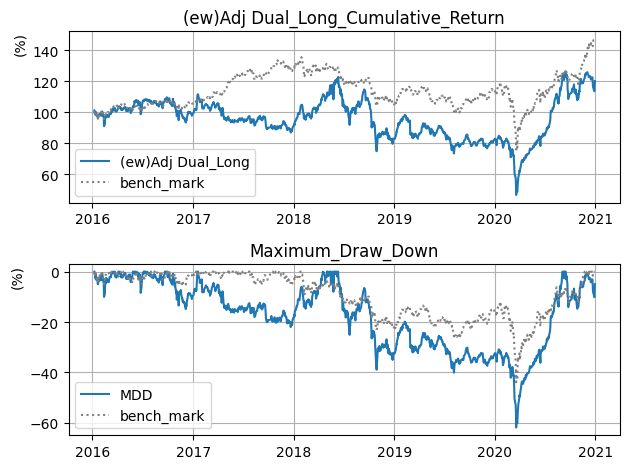

None


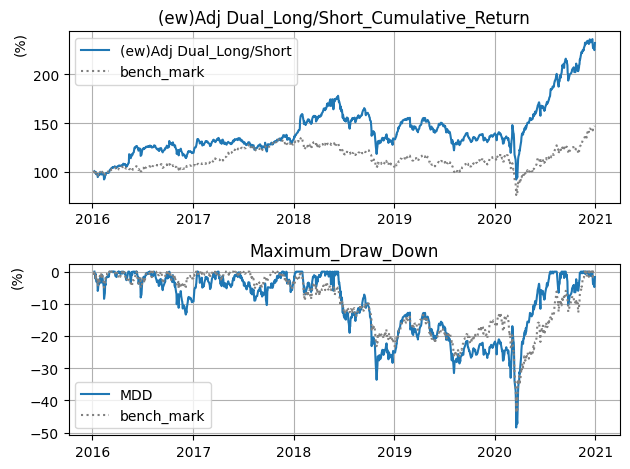

None


In [37]:
print(plot_performance(df, cap, 'ew', kospi['Adj Close'], time_long, '(ew)Adj Time_Long'))
print(plot_performance(df, cap, 'ew', kospi['Adj Close'], time_long_short, '(ew)Adj Time_Long/Short'))
print(plot_performance(df, cap, 'ew', kospi['Adj Close'], cross_long, '(ew)Adj Cross_Long'))
print(plot_performance(df, cap, 'ew', kospi['Adj Close'], cross_long_short, '(ew)Adj Cross_Long/Short'))
print(plot_performance(df, cap, 'ew', kospi['Adj Close'], dual_long, '(ew)Adj Dual_Long'))
print(plot_performance(df, cap, 'ew', kospi['Adj Close'], dual_long_short, '(ew)Adj Dual_Long/Short'))